# Phase 2 Data Cleaning

In this file, we proceed to clean up the dataset that we have. 

# business

#### - First lets convert the business jason file into a dataframe so we can start the cleaning process

In [1]:
import pandas as pd
import json
business = [json.loads(line) for line in open('yelp_academic_dataset_business.json', 'r')]     # create a dictionary to read in the json objects of the tip file
print (business[0])

{'business_id': 'f9NumwFMBDn751xgFiRbNA', 'name': 'The Range At Lake Norman', 'address': '10913 Bailey Rd', 'city': 'Cornelius', 'state': 'NC', 'postal_code': '28031', 'latitude': 35.4627242, 'longitude': -80.8526119, 'stars': 3.5, 'review_count': 36, 'is_open': 1, 'attributes': {'BusinessAcceptsCreditCards': 'True', 'BikeParking': 'True', 'GoodForKids': 'False', 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}", 'ByAppointmentOnly': 'False', 'RestaurantsPriceRange2': '3'}, 'categories': 'Active Life, Gun/Rifle Ranges, Guns & Ammo, Shopping', 'hours': {'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0', 'Wednesday': '10:0-18:0', 'Thursday': '11:0-20:0', 'Friday': '11:0-20:0', 'Saturday': '11:0-20:0', 'Sunday': '13:0-18:0'}}


In [2]:
#print out the key term
test = business[0]
test.keys()

dict_keys(['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours'])

In [3]:
business_df = pd.json_normalize (business)

In [4]:
business_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,attributes.BestNights,attributes.Music,attributes.Smoking,attributes.DietaryRestrictions,attributes.DriveThru,attributes.HairSpecializesIn,attributes.BYOBCorkage,attributes.AgesAllowed,attributes.RestaurantsCounterService,attributes.Open24Hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,9750 Weston Road,Vaughan,ON,L4H 2P2,43.838555,-79.559823,4.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209389,PotiAhtDMYMNsJCzV0oLAw,Walmart,3240 Wilkinson Blvd,Charlotte,NC,28208,35.226307,-80.893539,2.0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209390,SYa2j1boLF8DcGVOYfHPcA,Five Guys,7014-590 E Camelback Rd,Scottsdale,AZ,85251,33.504062,-111.929431,3.5,97,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
209391,RSSIsgO00OuWQTRoITacpA,Indian Trail Dog Training,,Indian Trail,NC,28079,35.101965,-80.599385,5.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### - After converting the json file to a dataframe and print the first 5 entries, we can see that there are columns that we wont need for our purpose. We also encountered another problem, the business file has all type of business and we are only interested in restaurants. One column that will help us is the "categories" column, lets print the first 20 items in our data to check the results.

In [5]:
business_df["categories"].head(20)

0     Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...
1     Health & Medical, Fitness & Instruction, Yoga,...
2                      Pets, Pet Services, Pet Groomers
3     Hardware Stores, Home Services, Building Suppl...
4     Home Services, Plumbing, Electricians, Handyma...
5     Auto Repair, Automotive, Oil Change Stations, ...
6     Dry Cleaning & Laundry, Local Services, Laundr...
7     Auto Repair, Oil Change Stations, Automotive, ...
8     Ethnic Food, Food Trucks, Specialty Food, Impo...
9     Martial Arts, Gyms, Fitness & Instruction, Act...
10              Contractors, Landscaping, Home Services
11                              Automotive, Auto Repair
12            Desserts, Food, Ice Cream & Frozen Yogurt
13           Contractors, Home Services, Local Services
14                               Beauty & Spas, Tanning
15                         Local Services, Self Storage
16                       Shopping, Shoe Stores, Fashion
17    Event Planning & Services, Wedding Plannin

#### - What we can see is that "categories" encloses key words describing each business. Since there is no more information that we can use to find if a business is a restaurant, we will find if "food" or "restaurant" is in the "categories" column and filter the results

In [6]:
all_restaurants_df = business_df[business_df['categories'].str.contains("food") | business_df['categories'].str.contains("Food") | business_df['categories'].str.contains('Restaurant') | business_df['categories'].str.contains('restaurant')] 
all_restaurants_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,attributes.BestNights,attributes.Music,attributes.Smoking,attributes.DietaryRestrictions,attributes.DriveThru,attributes.HairSpecializesIn,attributes.BYOBCorkage,attributes.AgesAllowed,attributes.RestaurantsCounterService,attributes.Open24Hours
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,M_guz7Dj7hX0evS672wIwA,Chocolate Shoppe Ice Cream,2831 Parmenter St,Middleton,WI,53562,43.105310,-89.510142,3.5,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,mKTq1T_IAplDpHUcMzOXkw,Tipsy Ryde,,Gastonia,NC,28054,35.252842,-81.152698,3.5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209383,BAVuLTDmpSzDCk37A5HjtQ,Bruegger's Bagels,27045 Lorain Rd,North Olmsted,OH,44070,41.416568,-81.921396,3.0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209385,hskVqZCPqy-omm9CHi44xQ,Domino's,"6420 Rea Rd, Suite B1",Charlotte,NC,28226,35.078538,-80.818358,2.0,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,9750 Weston Road,Vaughan,ON,L4H 2P2,43.838555,-79.559823,4.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209389,PotiAhtDMYMNsJCzV0oLAw,Walmart,3240 Wilkinson Blvd,Charlotte,NC,28208,35.226307,-80.893539,2.0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Now, after the filter we ended with a database of 80,505 restaurants. One other thing that we need to do is to delete the columns that we wont use, like the attributes. What we can do is to redo the dataframe again, but this time without copying all the attribute columns

In [7]:
all_restaurants_df =  all_restaurants_df[['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'stars','review_count','is_open','categories','hours']]
all_restaurants_df.set_index('name', inplace= True)
all_restaurants_df.reset_index(inplace=True)
all_restaurants_df

,name,business_id,address,city,state,postal_code,stars,review_count,is_open,categories,hours
0,The Empanadas House,pQeaRpvuhoEqudo3uymHIQ,404 E Green St,Champaign,IL,61820,4.5,5,1,"Ethnic Food, Food Trucks, Specialty Food, Impo...",NaN
1,Chocolate Shoppe Ice Cream,M_guz7Dj7hX0evS672wIwA,2831 Parmenter St,Middleton,WI,53562,3.5,6,1,"Desserts, Food, Ice Cream & Frozen Yogurt",NaN
2,Middle East Deli,CsLQLiRoafpJPJSkNX2h5Q,4508 E Independence Blvd,Charlotte,NC,28205,3.0,5,0,"Food, Restaurants, Grocery, Middle Eastern",NaN
3,Tipsy Ryde,mKTq1T_IAplDpHUcMzOXkw,,Gastonia,NC,28054,3.5,3,1,"Hotels & Travel, Transportation, Taxis, Beer, ...",NaN
4,Philthy Phillys,eBEfgOPG7pvFhb2wcG9I7w,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,4.5,4,1,"Restaurants, Cheesesteaks, Poutineries",NaN
...,...,...,...,...,...,...,...,...,...,...,...
80500,Bruegger's Bagels,BAVuLTDmpSzDCk37A5HjtQ,27045 Lorain Rd,North Olmsted,OH,44070,3.0,13,0,"Restaurants, Sandwiches, Food, Breakfast & Bru...",NaN
80501,Domino's,hskVqZCPqy-omm9CHi44xQ,"6420 Rea Rd, Suite B1",Charlotte,NC,28226,2.0,16,1,"Restaurants, Pizza, Sandwiches, Fast Food, Chi...",NaN
80502,Nishi Sushi,9Q0fPWAjUweoFDk0kafuzQ,9750 Weston Road,Vaughan,ON,L4H 2P2,4.0,5,0,"Japanese, Sushi Bars, Restaurants",NaN
80503,Walmart,PotiAhtDMYMNsJCzV0oLAw,3240 Wilkinson Blvd,Charlotte,NC,28208,2.0,13,0,"Department Stores, Food, Mobile Phones, Fashio...",NaN


#### We also need to filter the dataset by countries, since the file contains business from USA and Canada. 

In [8]:
all_restaurants_df.state.describe()  #to know how many different states do we have in the data

count     80505
unique       29
top          ON
freq      20093
Name: state, dtype: object

In [9]:
#this will help us to print the different states that are in the data
print(all_restaurants_df.state.value_counts())


ON     20093
AZ     15712
NV     10842
QC      7335
OH      7304
NC      6025
PA      5420
AB      4089
WI      2250
IL       845
SC       552
NY        13
TX         4
CA         3
BC         2
AL         2
CO         2
AR         1
HI         1
MB         1
FL         1
VA         1
OR         1
HPL        1
VT         1
XWY        1
NE         1
MO         1
WA         1
Name: state, dtype: int64


In [10]:
#Since we do not know what the abbreviations XWY and HPL represents, we can print them and look for the zip code
print(all_restaurants_df.loc[all_restaurants_df['state'] == 'XWY']) 
print(all_restaurants_df.loc[all_restaurants_df['state']== 'HPL'])

             name             business_id          address   city state  \
7539  Desi Masala  FByZsT1Sob5Vf1AYJFPxPg  61 Queen Street  Leeds   XWY   

     postal_code  stars  review_count  is_open  \
7539    LS27 8EB    4.5             5        0   

                          categories  hours  
7539  Indian, Pakistani, Restaurants    NaN  
              name             business_id                            address  \
12658  Home Burger  x5sx84Fa1cpnLwvXGtsJEw  1 Center St, Markham and Eglinton   

             city state postal_code  stars  review_count  is_open  \
12658  Hartlepool   HPL    TS24 7DA    4.5             3        1   

                 categories  hours  
12658  Burgers, Restaurants    NaN  


#### Our data has these estates by country:
#### USA: AZ, NV, OH, NC, PA, WI, IL, SC, NY, TX, CO
#### Canada: ON, QC, AB, BC
#### England: XWY, HPL
#### Now we proceed to create two new datasets separated by country for our purposes.

In [11]:
#Filter the data by canadian restaurants only
canada_restaurants_df=all_restaurants_df[all_restaurants_df['state'].str.contains("ON") | all_restaurants_df['state'].str.contains("QC") | all_restaurants_df['state'].str.contains("AB") | all_restaurants_df['state'].str.contains('BC')]
canada_restaurants_df.reset_index(inplace=True)
canada_restaurants_df

,index,name,business_id,address,city,state,postal_code,stars,review_count,is_open,categories,hours
0,4,Philthy Phillys,eBEfgOPG7pvFhb2wcG9I7w,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,4.5,4,1,"Restaurants, Cheesesteaks, Poutineries",NaN
1,5,Banzai Sushi,lu7vtrp_bE9PnxWfA8g4Pg,300 John Street,Thornhill,ON,L3T 5W4,4.5,7,1,"Japanese, Fast Food, Food Court, Restaurants",NaN
2,6,Front Door Organics,007Dg4ESDVacWcC4Vq704Q,415 Horner Avenue,Toronto,ON,M8W 4W3,4.0,8,0,"Shopping, Food, Organic Stores, Specialty Food...",NaN
3,7,Apadana Restaurant,9sRGfSVEfLhN_km60YruTA,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,3.0,3,1,"Persian/Iranian, Turkish, Middle Eastern, Rest...",NaN
4,8,IGA Extra,pcaQDBM6r0PWTXfYZK6RdA,8130 Boulevard Champlain,Lasalle,QC,H8P 1B4,3.0,6,1,"Food, Grocery",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
31514,80482,Resto-Cafe Oxford,ZM-BSBJRa5Wv8iYtLpEcww,5630 Rue Sherbrooke Ouest,Montréal,QC,H4A 1W5,3.0,23,1,"Restaurants, Canadian (New), Breakfast & Brunc...",NaN
31515,80490,Q's Shawarma,GAgEoHcf4PSuZRS5Zd3ltA,1075 Martin Grove Road,Toronto,ON,M9W 4W6,4.0,16,1,"Restaurants, Mediterranean",NaN
31516,80495,Starbucks,BtTCTHwoIfr3fBQjaOkpIw,81 Front Street E,Toronto,ON,M5E 1B8,4.0,22,1,"Coffee & Tea, Food",NaN
31517,80497,Steak & Cheese & Quick Pita Restaurant,n2BKYb8aw4AhRKLkdUjQRg,199 College St,Toronto,ON,M5T 1P9,2.5,21,1,"Sandwiches, Restaurants",NaN


In [12]:
#Filter the data by canadian restaurants only
usa_restaurants_df=all_restaurants_df[all_restaurants_df['state'].str.contains("AZ") | all_restaurants_df['state'].str.contains("CO") | all_restaurants_df['state'].str.contains("TX") | all_restaurants_df['state'].str.contains("NY") | all_restaurants_df['state'].str.contains("SC") | all_restaurants_df['state'].str.contains("IL") | all_restaurants_df['state'].str.contains("WI") | all_restaurants_df['state'].str.contains("PA") | all_restaurants_df['state'].str.contains("NV") | all_restaurants_df['state'].str.contains("OH") | all_restaurants_df['state'].str.contains('NC')]
usa_restaurants_df.reset_index(inplace=True)
usa_restaurants_df

,index,name,business_id,address,city,state,postal_code,stars,review_count,is_open,categories,hours
0,0,The Empanadas House,pQeaRpvuhoEqudo3uymHIQ,404 E Green St,Champaign,IL,61820,4.5,5,1,"Ethnic Food, Food Trucks, Specialty Food, Impo...",NaN
1,1,Chocolate Shoppe Ice Cream,M_guz7Dj7hX0evS672wIwA,2831 Parmenter St,Middleton,WI,53562,3.5,6,1,"Desserts, Food, Ice Cream & Frozen Yogurt",NaN
2,2,Middle East Deli,CsLQLiRoafpJPJSkNX2h5Q,4508 E Independence Blvd,Charlotte,NC,28205,3.0,5,0,"Food, Restaurants, Grocery, Middle Eastern",NaN
3,3,Tipsy Ryde,mKTq1T_IAplDpHUcMzOXkw,,Gastonia,NC,28054,3.5,3,1,"Hotels & Travel, Transportation, Taxis, Beer, ...",NaN
4,9,Missy Donuts & Coffee,DCsS3SgVFO56F6wRO_ewgA,1255 W Main St,Mesa,AZ,85201,2.5,7,0,"Donuts, Juice Bars & Smoothies, Food, Coffee &...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
48964,80499,Julep,xVpE01l6ZXdEtVf5PkRpDg,829 E Washington Ave,Madison,WI,53703,4.0,95,0,"Nightlife, Diners, Bars, Southern, Restaurants",NaN
48965,80500,Bruegger's Bagels,BAVuLTDmpSzDCk37A5HjtQ,27045 Lorain Rd,North Olmsted,OH,44070,3.0,13,0,"Restaurants, Sandwiches, Food, Breakfast & Bru...",NaN
48966,80501,Domino's,hskVqZCPqy-omm9CHi44xQ,"6420 Rea Rd, Suite B1",Charlotte,NC,28226,2.0,16,1,"Restaurants, Pizza, Sandwiches, Fast Food, Chi...",NaN
48967,80503,Walmart,PotiAhtDMYMNsJCzV0oLAw,3240 Wilkinson Blvd,Charlotte,NC,28208,2.0,13,0,"Department Stores, Food, Mobile Phones, Fashio...",NaN


## RATES BY STATE

#### Now, we need to create two tables to show how the ratings are distributed in each state by country, and graph these. 

      name                                              
stars  1.0  1.5   2.0   2.5   3.0   3.5   4.0   4.5  5.0
state                                                   
AB      34   85   225   372   743   992   957   553  128
BC       0    2     0     0     0     0     0     0    0
ON     147  403  1127  2189  3968  5057  4619  2107  476
QC      36  105   247   483  1055  1512  2096  1429  372


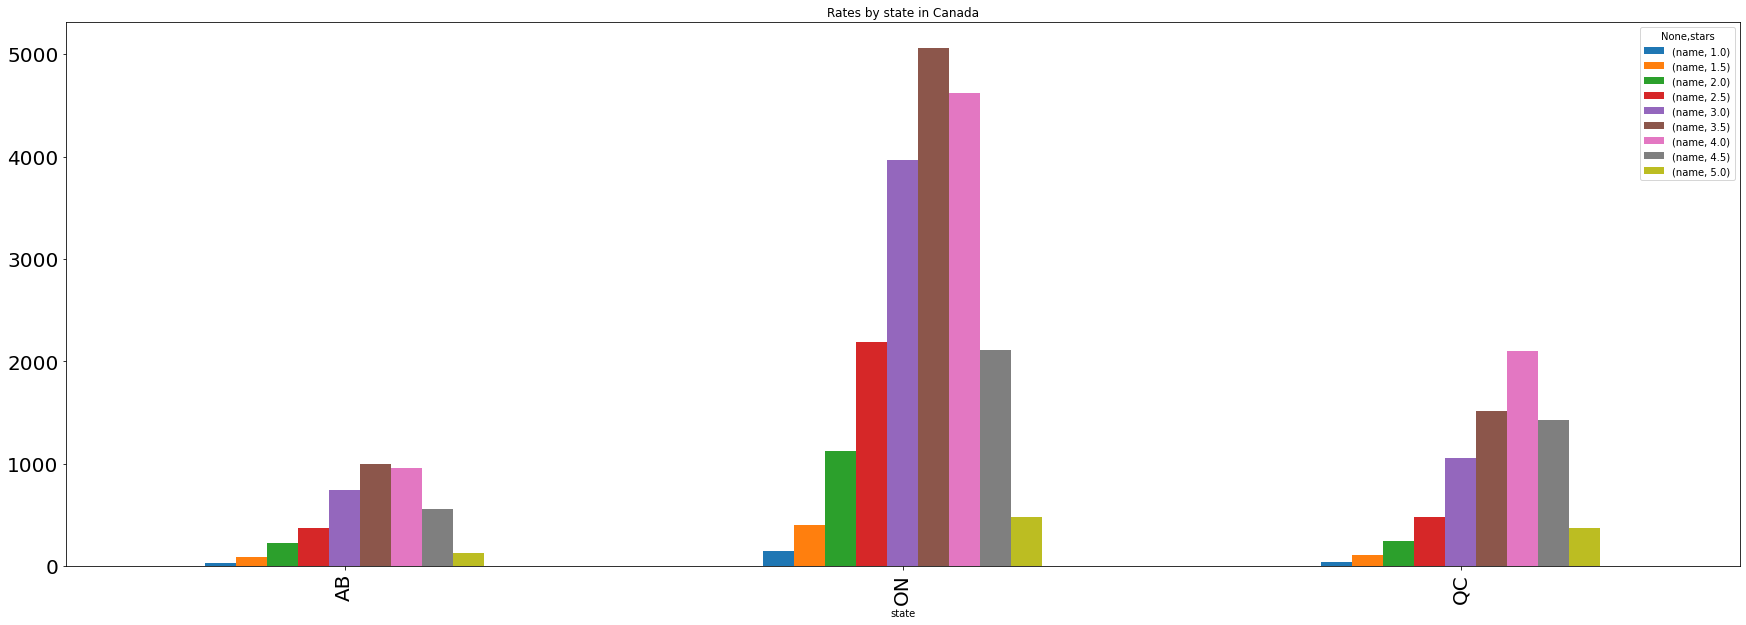

In [13]:
ratevsstateCA=pd.pivot_table(canada_restaurants_df,index=["state"],columns="stars",values=["name"], aggfunc="count",fill_value=0)
print(ratevsstateCA)
ratevsstateCA.loc[['AB','ON','QC']].plot.bar(title="Rates by state in Canada", fontsize='20', figsize=(30,10))

stars  1.0  1.5   2.0   2.5   3.0   3.5   4.0   4.5  5.0
state                                                   
AZ     119  435  1086  1616  2644  3284  3663  2158  707
CO       0    0     1     1     0     0     0     0    0
IL       3   25    79    81   169   197   167   100   24
NC      49  200   387   625   973  1310  1410   853  218
NV      68  244   706  1119  1738  2274  2585  1643  465
NY       1    0     1     2     2     0     2     4    1
OH      93  219   459   778  1147  1582  1742  1001  283
PA      32  119   270   501   902  1195  1267   890  244
SC       4   20    44    59   105   110   115    71   24
TX       0    1     1     0     0     1     1     0    0
WI      18   47   113   231   355   517   554   328   87


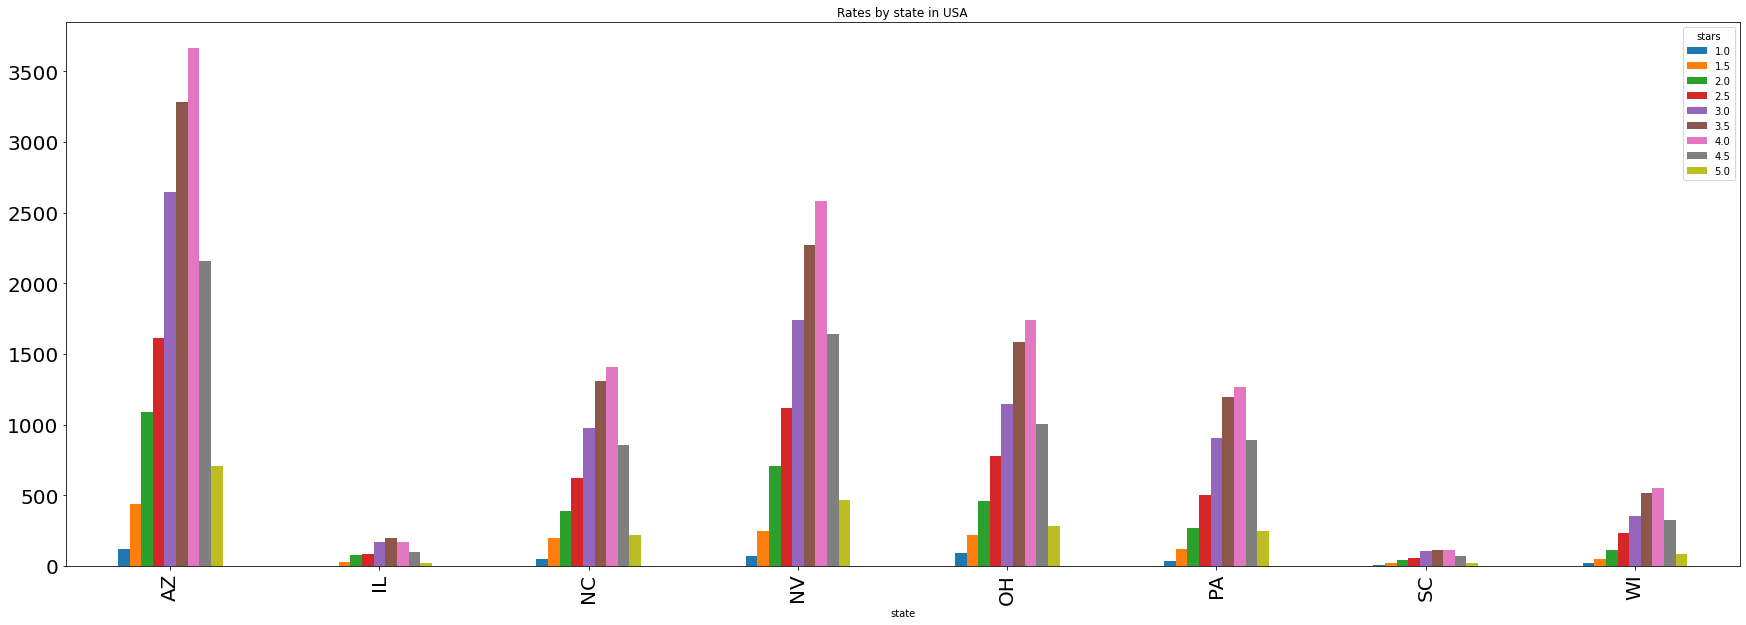

In [14]:
ratevsstateUSA=pd.pivot_table(usa_restaurants_df,index=["state"],columns="stars",values="name", aggfunc="count", fill_value=0 )
print (ratevsstateUSA)
ratevsstateUSA.loc[['AZ','IL', 'NC', 'NV','OH','PA','SC','WI']].plot.bar(title="Rates by state in USA", fontsize='20', figsize=(30,10))

### After checking both graphs, we can come up with some observations, like we can see that the most used rating in USA is 4.0 in every state, while in Canada is 3.5. Do this mean that the people in Canada is a little bit more critique? Or that the restaurants in USA provide better service? We will need to make a deeper analysis in phase 3 of the project to prove or disapprove these points.  

## Hamburguer vs Poutine

#### One other thing that we want to analyze is the relation between USA and restaurants that sell hamburguers and Canada with Putine. Since these are the traditional foods for each country, we want to check if these are some of the most popular restaurants based in the number of restaurants and the ratings. 

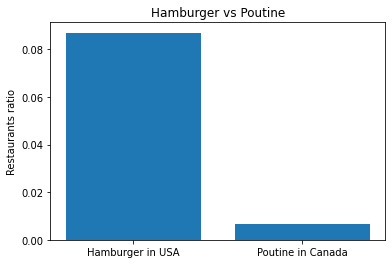

In [15]:
import re
import matplotlib.pyplot as plt
burgersUSA= usa_restaurants_df["categories"].str.count("burger", re.I).sum()
burgersUSA= burgersUSA/len(usa_restaurants_df)  #divide by the total number of restaurants in 
#print (burgersUSA)
poutineCA= canada_restaurants_df["categories"].str.count("poutine", re.I).sum()
poutineCA=poutineCA/len(canada_restaurants_df) #divide by the total number of restaurants in canada
#print (poutineCA)
newgraph = [burgersUSA, poutineCA]
plt.bar(["Hamburger in USA", "Poutine in Canada"], newgraph)
plt.title('Hamburger vs Poutine')
plt.ylabel('Restaurants ratio')
plt.show()

#### What we can see from this graph is that the ratio of restaurants that sells burgers in USA is way bigger that the ratio of restaurants that sell poutine in Canada. Since its not common to find restaurants that sell poutine in USA, we can check only how is te ratio in Canada between Hamburgers and Poutin. 

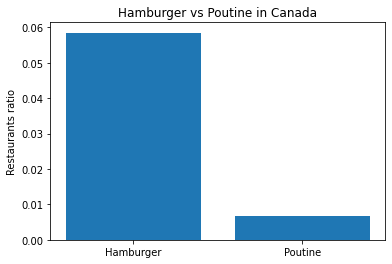

In [16]:
burgersCA= canada_restaurants_df["categories"].str.count("burger", re.I).sum()
burgersCA= burgersCA/len(canada_restaurants_df)  #divide by the total number of restaurants in 
newgraph = [burgersCA, poutineCA]
plt.bar(["Hamburger", "Poutine"], newgraph)
plt.title('Hamburger vs Poutine in Canada')
plt.ylabel('Restaurants ratio')
plt.show()

#### What we can see in this last graph is that even in Canada hamburgers are more frequent in restaurants than the traditional food "poutine". The total ratio for hamburgers in Canada is just slightly different from the ratio in USA, therefore apparently hamburgers are found in Canada in a similar proportion than in the USA. 

In [17]:
#!/usr/bin/python

#from mpl_toolkits.basemap import Basemap

#import matplotlib.pyplot as plt

#import numpy as np

from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt

import numpy as np

import csv





# input desired coordinates

my_coords = [38.9719980,-76.9219820]



# How much to zoom from coordinates (in degrees)

zoom_scale = 1



# Setup the bounding box for the zoom and bounds of the map

bbox = [my_coords[0]-zoom_scale,my_coords[0]+zoom_scale,\

        my_coords[1]-zoom_scale,my_coords[1]+zoom_scale]



plt.figure(figsize=(12,6))

# Define the projection, scale, the corners of the map, and the resolution.

m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\

            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')



# Draw coastlines and fill continents and water with color

m.drawcoastlines()

m.fillcontinents(color='peru',lake_color='dodgerblue')



# draw parallels, meridians, and color boundaries

m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])

m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)

m.drawmapboundary(fill_color='dodgerblue')



# build and plot coordinates onto map

x,y = m(my_coords[1],my_coords[0])

m.plot(x,y,marker='D',color='r')

plt.title("Geographic Point Test")

plt.savefig('coordinate_test.png', format='png', dpi=500)

plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'